![my_image.png](images/american_sign_language.PNG)


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_PATH = 'data/sign_mnist_train.csv'
TEST_PATH = 'data/sign_mnist_test.csv'

In [3]:
train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
print(f"Dimension of Train data: {train_data.shape}") 
print(f"Dimension of test data: {test_data.shape}") 

Dimension of Train data: (27455, 785)
Dimension of test data: (7172, 785)


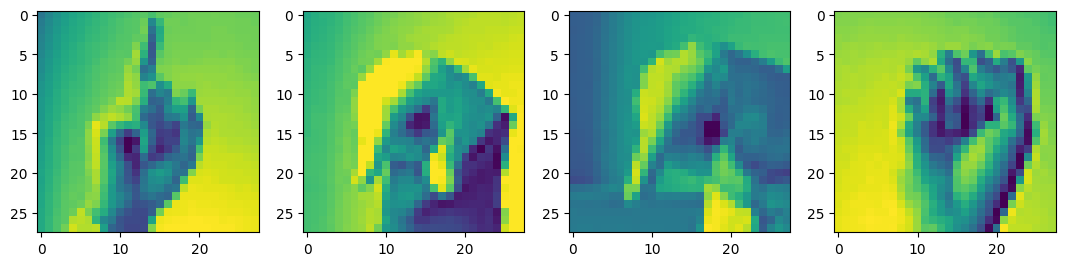

In [7]:
f = plt.figure(figsize=(20,6))
ax = f.add_subplot(161)
ax2 = f.add_subplot(162)
ax3 = f.add_subplot(163)
ax4 = f.add_subplot(164)

ax.imshow(train_data.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train_data.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train_data.iloc[15].values[1:].reshape(28,28))
ax4.imshow(train_data.iloc[20].values[1:].reshape(28,28))

plt.show()

<Axes: ylabel='count'>

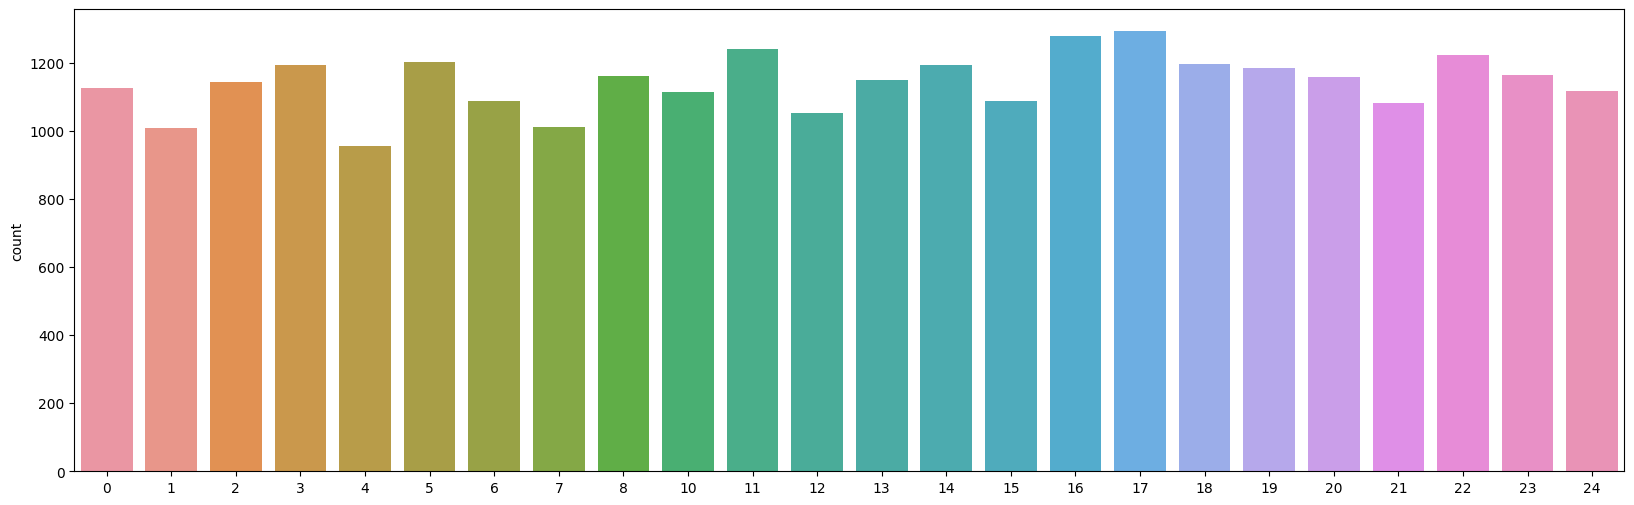

In [8]:
labels = train_data['label'].values
plt.figure(figsize=(20,6))
sns.countplot(x=labels)

In [9]:
x_train = np.array(train_data.drop(columns=['label']))
y_train = np.array(train_data['label'])

x_test = np.array(test_data.drop(columns=['label']))
y_test = np.array(test_data['label'])

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train.shape
x_test.shape

(7172, 784)

In [11]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train.shape 
x_test.shape

(7172, 28, 28, 1)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.2, random_state=30) 

print(f"X_train shape = {x_train.shape}")
print(f"X_test shape = {x_test.shape}")
print(f"Y_train shape = {y_train.shape}")
print(f"Y_test shape = {y_test.shape}")

X_train shape = (21964, 28, 28, 1)
X_test shape = (5491, 28, 28, 1)
Y_train shape = (21964,)
Y_test shape = (5491,)


<function matplotlib.pyplot.show(close=None, block=None)>

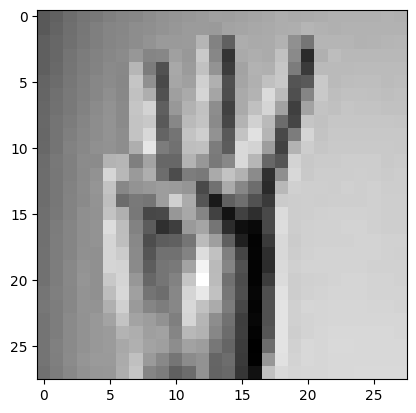

In [15]:
plt.imshow(x_train[100][:,:,0], cmap="gray")
plt.show

In [16]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(512,(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(26, activation="softmax")

])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 512)        0

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(
     monitor='val_accuracy',
    baseline=0.99,  # Validation accuracy threshold (99%)
    patience=5,      # Number of epochs with no improvement before stopping
    mode='auto',
    restore_best_weights=True
)

In [20]:
epochs = 10
batch = 100

In [21]:
history = model.fit(x_train, y_train, batch_size=batch, 
                              epochs=epochs, 
                              validation_data=(x_test, y_test),
                              callbacks=[early_stopping_callback])

if early_stopping_callback.stopped_epoch > 0:
    print(f"Training was stopped early at epoch {early_stopping_callback.stopped_epoch + 1} due to reaching the desired accuracy.")
else:
    print("Training completed without early stopping.")

Epoch 1/10
220/220 [==============================] - 69s 301ms/step - loss: 1.2001 - accuracy: 0.6345 - val_loss: 0.1614 - val_accuracy: 0.9510
Epoch 2/10
220/220 [==============================] - 60s 274ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 3/10
220/220 [==============================] - 59s 266ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.0099 - val_accuracy: 0.9984
Epoch 4/10
220/220 [==============================] - 67s 304ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/10
220/220 [==============================] - 67s 303ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 9.1039e-04 - val_accuracy: 0.9998
Epoch 6/10
220/220 [==============================] - 63s 288ms/step - loss: 0.0203 - accuracy: 0.9946 - val_loss: 0.0176 - val_accuracy: 0.9927
Epoch 7/10
220/220 [==============================] - 60s 274ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 3.9312e-04 

In [22]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

172/172 [==============================] - 5s 27ms/step - loss: 0.0016 - accuracy: 1.0000
Test Loss: 0.0016, Test Accuracy: 100.00%


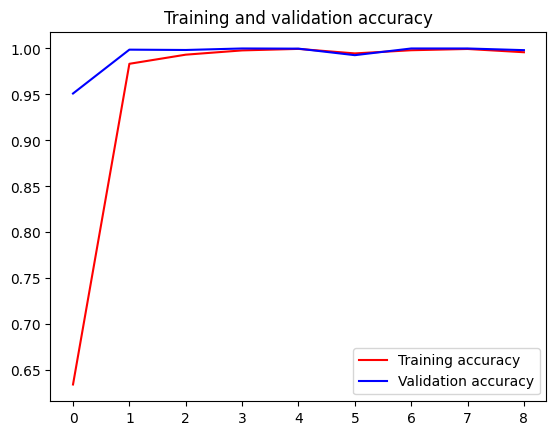

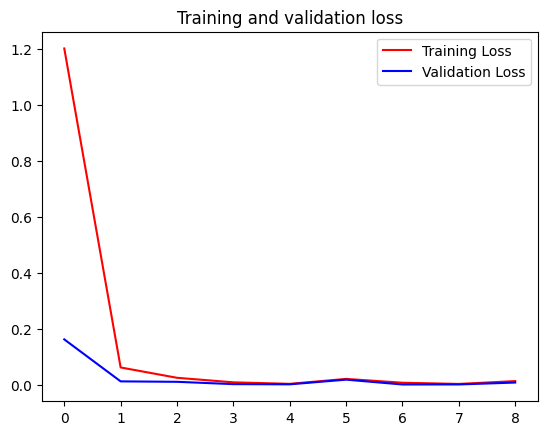

In [31]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [24]:
# Save the entire model to a file
model.save('sign_language_model.h5')

In [26]:
# Load the saved model
loaded_model = tf.keras.models.load_model('sign_language_model.h5')